<font size=7> Latencies Analysis

# Get Pairs

In [1]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, read_phy_files,\
                                  plot_latency_dist_hist, plot_latency_angle_hist, latency_times, plot_vector_layout5, plot_vector_layout1,\
                                   arrow_check, arrow_check2
from human_hip.animate import animate_latencies
from ipywidgets import interact_manual, interact
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
with open("/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl", "rb") as filename:
    sd = pickle.load(filename)

In [3]:
import numpy as np
from human_hip.spike_data import latencies, cross_sttc

(-0.1, 0.2)

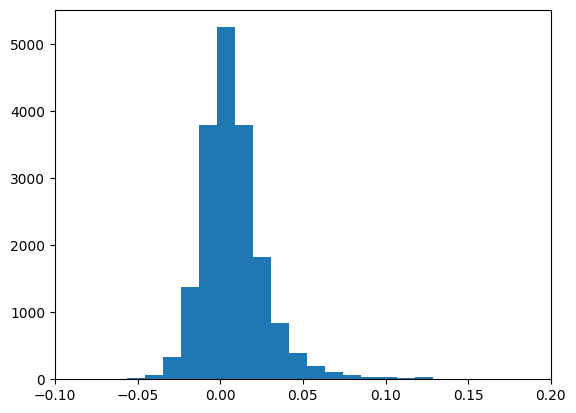

In [4]:
sttc_neo = sd.spike_time_tilings( 20 ) 
plt.hist( sttc_neo.flatten(), bins=100 )
plt.xlim(-.1,.2)


In [5]:

import numpy as np
from human_hip.spike_data import latencies, cross_sttc


def curate_latencies(sd,  latency_ms=30, sttc_cutoff = 0, latency_cutoff=1, sttc_delta=20, pval=.05, min_latencies=25 ):

    # Get all latencies whose STTC is above some minimum STTC cuttoff
    print(sd.N**2 , "Starting Pairs")
    sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
    pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
    for i in range(sd.N):
        for j in range(i+1,sd.N):
            if sttc_neo[i,j] > sttc_cutoff:
                pairs.append([i,j])
    print( len(pairs), "pairs above sttc cutoff")

    # Get all latencies whose median latency is above some minimum Latency Cuttoff
    pairs_late = [] #lags_late = []
    for pair in pairs:
        pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  #latency= np.median(pair_latencies)
        if len(pair_latencies)>=min_latencies and abs(np.mean(pair_latencies))> latency_cutoff :
            if np.mean(pair_latencies) < 0:
                pair_latencies = latencies( pair[1], pair[0], sd, ms_cutoff_high=latency_ms) 
                if np.mean(pair_latencies)> latency_cutoff and len(pair_latencies)>=min_latencies:
                    t_stat, p_value = stats.ttest_1samp( pair_latencies, 0)
                    if p_value < pval:
                        pairs_late.append( [ pair[1], pair[0] ] )
            else:
                t_stat, p_value = stats.ttest_1samp( pair_latencies, 0)
                if p_value < pval:
                    pairs_late.append( pair )
    print( len(pairs_late), "pairs above latencency cutoff")

    mean_latencies = []
    for pair in pairs_late:
        mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  )
        mean_latencies.append(mean_latency)
    print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))
    #good_pairs =   np.array(pairs_final)

    return  pairs_late

In [6]:
latency_ms = 30
# good_pairs = curate_latencies(sd, latency_ms=30, sttc_cutoff = 0.01, latency_cutoff=1, sttc_delta=20, pval=.05, min_latencies=25 ) 

# # latency_ms = 15
# # good_pairs = curate_latencies(sd,  latency_ms=latency_ms, sttc_cutoff = 0.02, latency_cutoff=1, sttc_delta=20, pval=.05 ) 

# good_pairs2 = np.array(good_pairs)
# with open( 'hc328_good_pairs.pkl' , 'wb') as my_file:
#    pickle.dump(good_pairs, my_file)



#   # load pickled data
with open( 'hc328_good_pairs.pkl' , 'rb') as my_file:
    good_pairs = pickle.load(my_file)

In [7]:
# with open( 'hc328_good_pairs.pkl' , 'wb') as my_file:
#    pickle.dump(good_pairs, my_file)

In [8]:
#good_pairs
print( len(good_pairs), "good pairs" )

mean_latencies = []
for pair in good_pairs:
    mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  )
    mean_latencies.append(mean_latency)
print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))

172 good pairs
all final pairs positive?: True


# make plots

all final pairs positive?: True


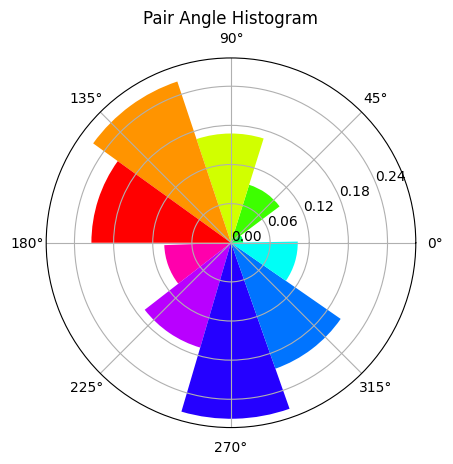

In [14]:
plot_latency_angle_hist(sd, good_pairs, late_cutoff_high=latency_ms)

all final pairs positive?: True


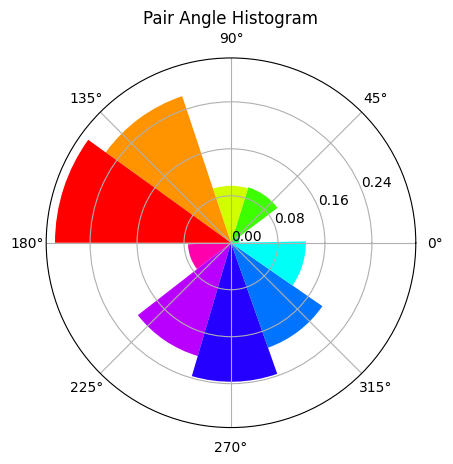

In [15]:
plot_latency_angle_hist(sd, good_pairs, by_firing_rate=True, late_cutoff_low=0, late_cutoff_high=latency_ms)

# Make Plots

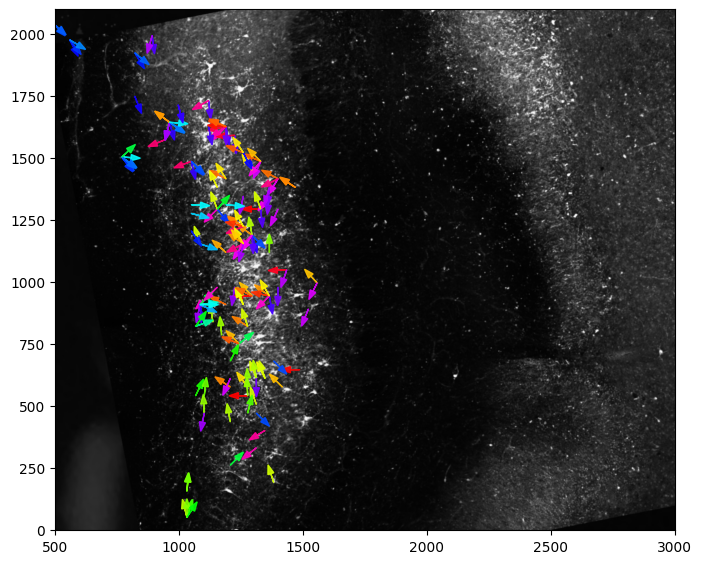

In [16]:
plot_vector_layout1( sd, good_pairs, image_path="/workspaces/human_hippocampus/data/histology/hc328_bw.jpeg", xlim=(500,3000) )

Pairs removed by SD cutoff: 21


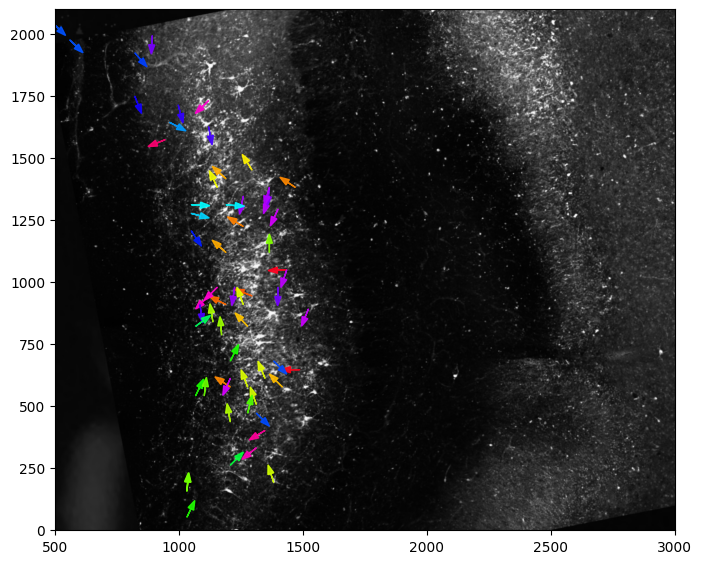

In [8]:
plot_vector_layout5( sd, good_pairs, image_path="/workspaces/human_hippocampus/data/histology/hc328_bw.jpeg",
                         figsize=(8, 8), xlim=(500,3000), #ylim=(0,1600),
                         sd_cuttoff=.5 , latency_ms=30)

# <font color="violet"> Haussler Check

## <font color="violet"> Fit polynomial to data

/tmp/ipykernel_1020/3452548030.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


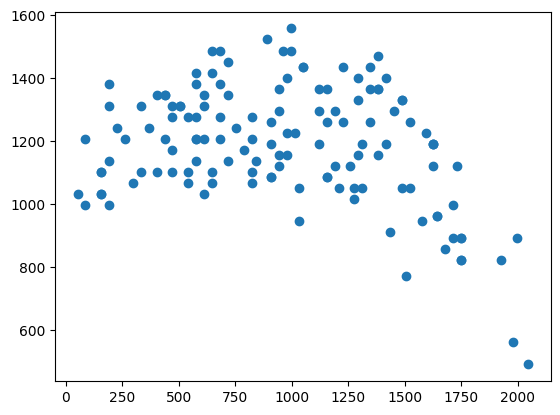

In [9]:

neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)


# x_og = neuron_xy[:,0]
# y_og = neuron_xy[:,1]

x = neuron_xy[:,0]
y = neuron_xy[:,1]

plt.scatter(  y, x  ) 



In [10]:
x

array([ 770. , 1155. , 1120. , 1015. , 1050. , 1085. , 1260. , 1172.5,
       1242.5, 1190. , 1085. , 1365. , 1207.5, 1120. , 1102.5, 1067.5,
       1260. , 1190. , 1207.5, 1137.5, 1400. , 1435. , 1312.5, 1050. ,
        945. , 1365. , 1085. ,  945. , 1225. , 1155. , 1190. , 1295. ,
       1487.5, 1487.5, 1295. , 1085. , 1207.5, 1207.5, 1435. ,  910. ,
       1050. , 1155. , 1557.5, 1120. , 1207.5, 1400. ,  822.5, 1330. ,
       1365. , 1365. , 1067.5, 1102.5, 1102.5, 1382.5, 1400. , 1417.5,
        490. , 1225. ,  997.5, 1032.5, 1102.5, 1102.5, 1137.5, 1260. ,
       1365. ,  892.5, 1120. , 1382.5, 1522.5,  822.5,  997.5, 1032.5,
       1330. , 1190. , 1225. ,  892.5,  892.5, 1242.5,  822.5,  892.5,
       1487.5, 1312.5, 1417.5, 1365. ,  857.5, 1312.5, 1067.5, 1102.5,
       1137.5, 1207.5, 1067.5,  962.5, 1137.5, 1347.5, 1102.5, 1172.5,
        962.5, 1207.5, 1435. , 1277.5, 1347.5, 1120. , 1277.5, 1207.5,
       1330. , 1032.5, 1190. , 1050. , 1050. , 1050. , 1155. , 1277.5,
      

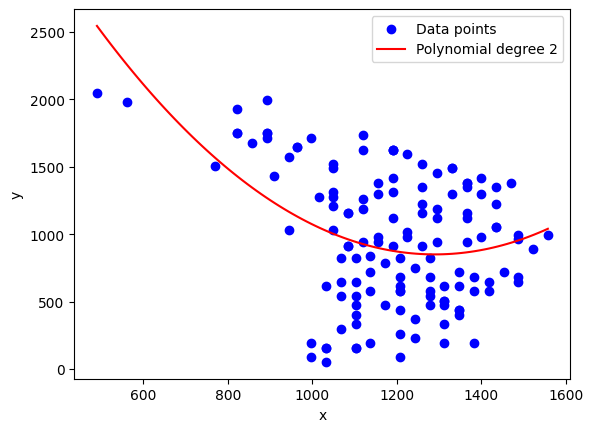

In [11]:
# Fit polynomial of degree n
degree = 2  # Change this to fit higher-degree polynomial
coefficients = np.polyfit(x, y, degree)

# Create polynomial function from coefficients
polynomial = np.poly1d(coefficients)

# Generate x values for plotting the polynomial line
x_plot = np.linspace(min(x), max(x), 100)
y_plot = polynomial(x_plot)

# Plot the data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot the polynomial line
plt.plot(x_plot, y_plot, color='red', label=f'Polynomial degree {degree}')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

## <font color="violet"> Get index from fit for each neuron

In [12]:
def find_closest_indices(x, y, x_plot, y_plot):
    closest_indices = []
    for xi, yi in zip(x, y):
        distances = np.sqrt((x_plot - xi)**2 + (y_plot - yi)**2)
        closest_index = np.argmin(distances)
        closest_indices.append(closest_index)
    return closest_indices


In [13]:

closest_indices = find_closest_indices( x, y,  x_plot, y_plot)


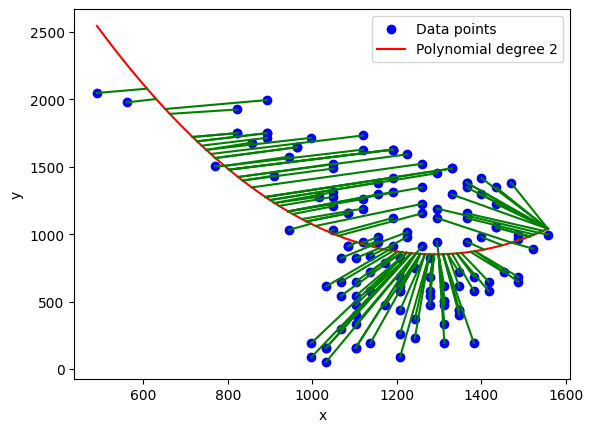

In [14]:

# Plot the data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot the polynomial line
plt.plot(x_plot, y_plot, color='red', label=f'Polynomial degree {degree}')

for i, idx in enumerate(closest_indices):
    plt.plot([x[i], x_plot[idx]], [y[i], y_plot[idx]], color='green')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## <font color="violet"> Get index and angle for each arrow

<font color="red"> <b> Not weighted by firing rate

In [15]:
from sklearn import preprocessing

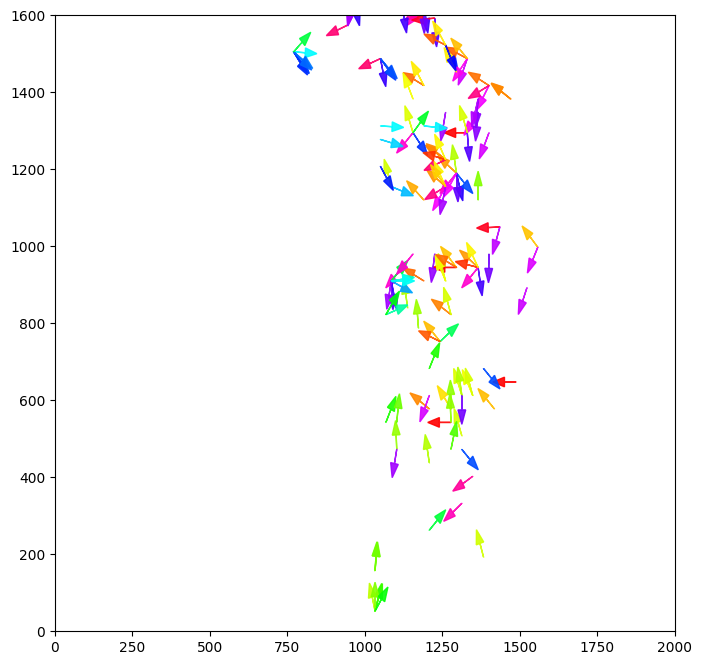

In [16]:
plot_vector_layout1( sd, good_pairs,  xlim=(0,2000), ylim=(0,1600))

In [17]:
pairs = good_pairs

/tmp/ipykernel_1020/310852070.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


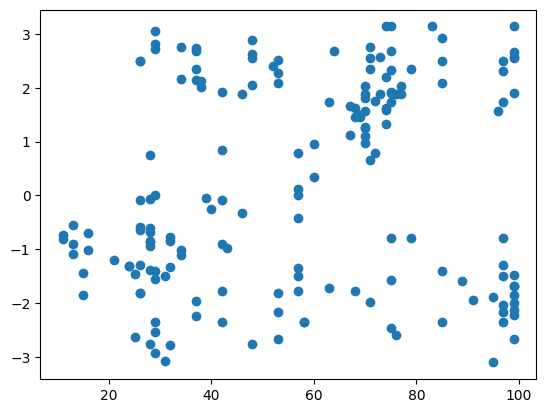

In [18]:

# Get the x/y locations of the start and end neurons of each pair
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)

# Get angle for each arrow
starts = neuron_xy[ [pair[0] for pair in pairs] ]  # Get the x/y locations of the start and end neurons of each pair
ends = neuron_xy[ [pair[1] for pair in pairs] ]
centered = ends-starts   # Get the directions of arrows, then make of of them the same length
normalized = preprocessing.normalize(centered) #* 75
angles = np.arctan2( normalized[:, 1], normalized[:, 0] ) 
#angles2 = (angles*-1+ np.pi)/np.pi/2

# closest indices
fit_indices = [closest_indices[pair[0]] for pair in pairs] 



plt.scatter( fit_indices, angles )

# Plot original scatter
# plt.figure(figsize=(8, 8))
# ax = plt.axes()
# plt.xlim( xlim )
# plt.ylim( ylim )    

# Draw Arrows
# cmap = cm.get_cmap('hsv')
# for i in range(len(starts)):
#     arrow = FancyArrow( 
#             starts[i][0], starts[i][1], normalized[i][0]*75, normalized[i][1]*75, length_includes_head=True, head_width=25,
#             linewidth=1, color=cmap(angles2[i]), alpha=0.9 ) #color="red"
#     plt.gca().add_patch(arrow)



# <font color="magenta"> T-Test

In [19]:
import math
import scipy.stats as stats

In [20]:
#angles

In [21]:
def rotate_angles( angles, add=1):
    adjusted_angles = []
    for num in angles:
        num += add         # Add 1 to the number
        adjusted_num = ((num + math.pi) % (2 * math.pi)) - math.pi  # modulo operation to wrap within -pi to pi
        adjusted_angles.append(adjusted_num)
    return np.array(adjusted_angles)

In [24]:
fit_indices = np.array(fit_indices)

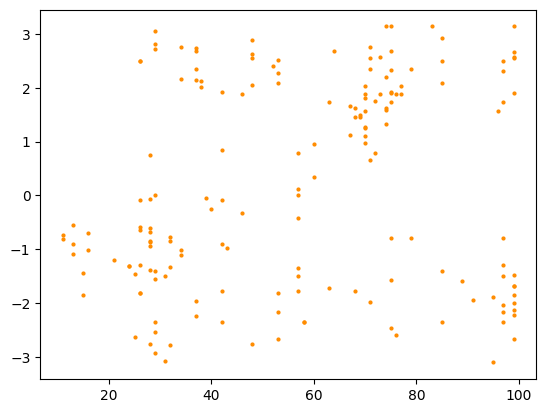

In [22]:
plt.scatter( fit_indices, angles  , alpha=1, s=4, c="darkorange")

In [25]:
t_statistic, p_value = stats.ttest_ind( fit_indices[angles>0]  ,  fit_indices[angles<0] )
p_value


0.00027833618194602635

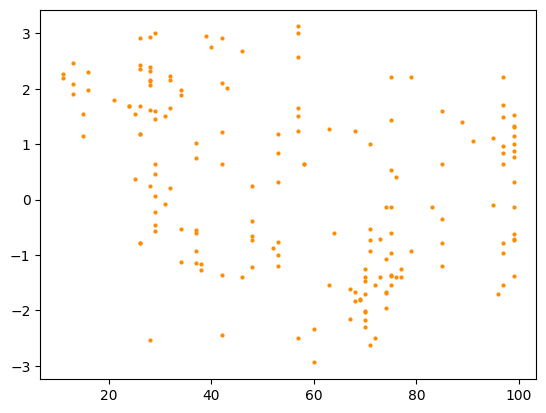

In [101]:
angles2 = rotate_angles( angles, 3)
plt.scatter( fit_indices, angles2  , alpha=1, s=4, c="darkorange")

In [103]:
t_statistic, p_value = stats.ttest_ind( fit_indices[angles2>0]  ,  fit_indices[angles2<0] )
p_value


0.0001580883347060278